# Relatório de Análise VIII

## Identificando e Removendo Outiers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

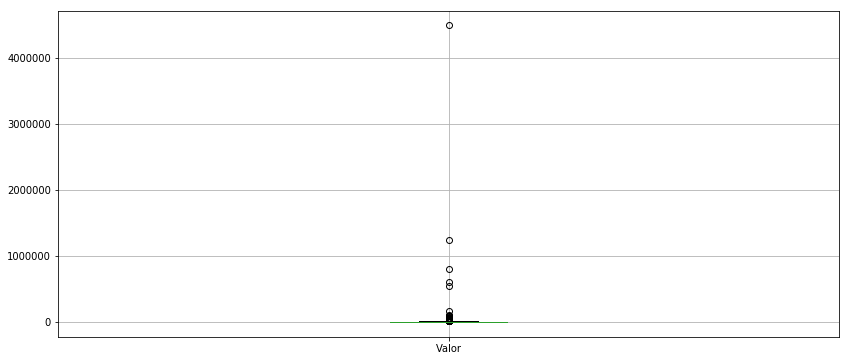

In [3]:
# BoxPlot com poluição
dados.boxplot(['Valor'])

In [4]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0


In [5]:
valor = dados['Valor']

In [8]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)

IIQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [10]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

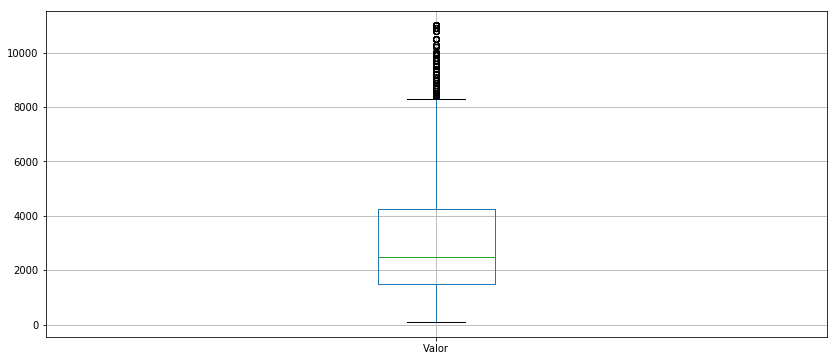

In [11]:
# BoxPlot sem poluição
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a5400e3c8>]], dtype=object)

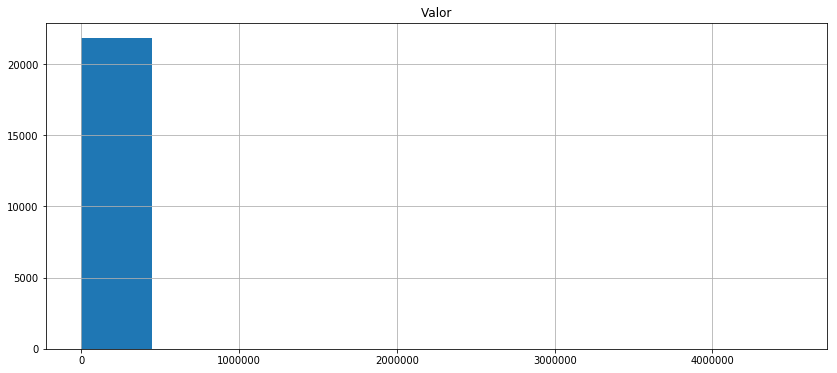

In [13]:
# Histograma antes
dados.hist(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a53eeed68>]], dtype=object)

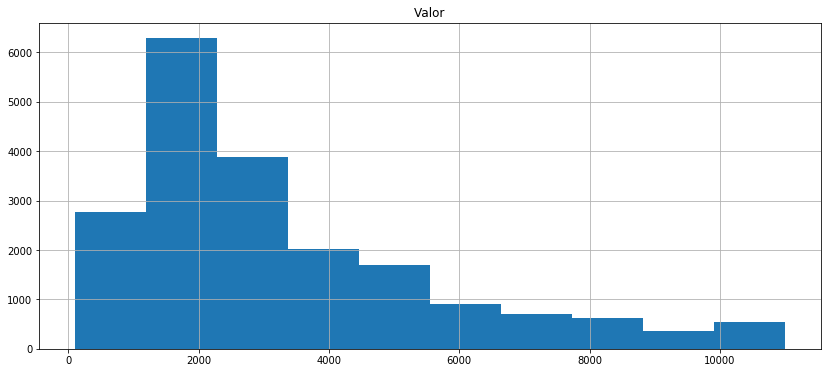

In [14]:
# Histograma depois
dados_new.hist(['Valor'])